In [1]:
from policy_loader import create_analyzer_with_files
import nltk


/Users/yehrimhwang/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


!pip install textblob
!pip install nltk

In [2]:
import nltk

#  equired NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yehrimhwang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yehrimhwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yehrimhwang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
versions = {
    '2013-06-08': 'thisisyourdigitallife.html',
    '2015-12-04': 'FBfoundOut_CA.html',
    '2018-02-01': 'pre_CA.html',  
    '2018-08-02': 'post_CA.html', 
    '2019-03-01': 'pre_cultura.html',
    '2019-05-31': 'post_cultura.html',
    '2024-12-04' : 'currentpolicy.html'
}

# initialize analyzer
analyzer = create_analyzer_with_files(versions)

print("\n2013 (release of thisisyourdigitallife) vs 2015 (Facebook asks CA to erase data)")
analysis = analyzer.analyze_changes('2013-06-08', '2015-12-04')
print("Analysis keys:", analysis.keys())

print(f"Overall Similarity: {analysis['semantic_similarity']:.2%}")
print("\nTopic Changes:")
for topic, changes in analysis['topic_changes'].items():
    if changes['change'] != 0:
        print(f"- {topic}: {changes['before']} → {changes['after']} (change: {changes['change']})")

print("\nRequirement Changes:")
print(f"Requirements before: {analysis['requirement_changes']['total_before']}")
print(f"Requirements after: {analysis['requirement_changes']['total_after']}")

print("\nChanges after Cambridge Analytica Publicly Exposed:")
analysis = analyzer.analyze_changes('2018-02-01', '2018-08-02')
print("\n2013(release of thisisyourdigitallife) vs 2015 (Facebook asks CA to eradicate data):")
print(analyzer.generate_summary_report('2013-06-08', '2015-12-04'))

print("\nChanges after Cambridge Analytica Publicly Exposed:")
print(analyzer.generate_summary_report('2018-02-01', '2018-08-02'))

print("\nChanges after Cultura Collective:")
print(analyzer.generate_summary_report('2019-03-01', '2019-05-31'))

print("\n 2013 vs 2024:")
print(analyzer.generate_summary_report('2013-06-08', '2024-12-04'))





2013 (release of thisisyourdigitallife) vs 2015 (Facebook asks CA to erase data)
Analysis keys: dict_keys(['date_range', 'semantic_similarity', 'word_count_change', 'topic_changes', 'requirement_changes'])
Overall Similarity: 71.47%

Topic Changes:
- user_consent: 2 → 1 (change: -1)
- data_sharing: 1 → 2 (change: 1)
- compliance: 10 → 17 (change: 7)

Requirement Changes:
Requirements before: 78
Requirements after: 14

Changes after Cambridge Analytica Publicly Exposed:

2013(release of thisisyourdigitallife) vs 2015 (Facebook asks CA to eradicate data):
Policy Change Analysis: 2013-06-08 to 2015-12-04

Overall Similarity: 71.47%

Topic Changes:
- User Consent: 2 → 1 (-1)
- Data Sharing: 1 → 2 (+1)
- Compliance: 10 → 17 (+7)

Requirement Changes:
- Total requirements before: 78
- Total requirements after: 14
- Similar requirements found: 1

Significant Requirement Changes:

Old: In other countries, you must comply with local copyright laws and implement an appropriate "notice and taked

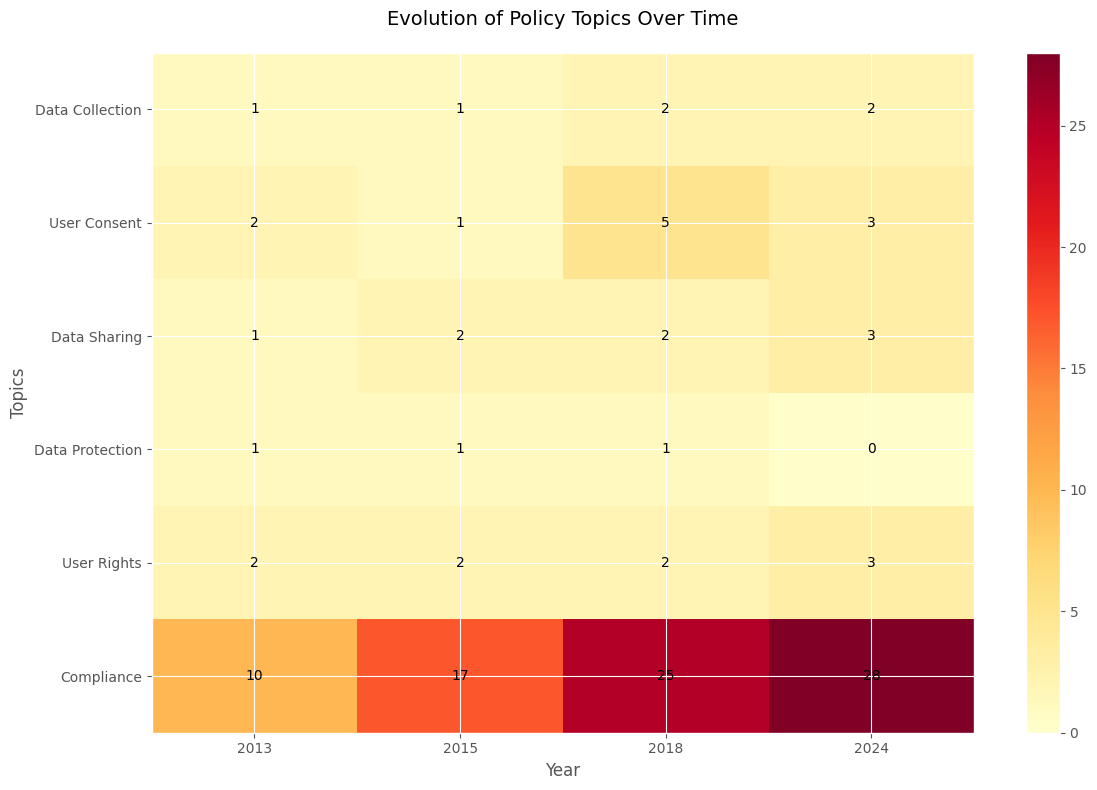

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

#df for topic changes across years
topic_data = {
    '2013': [1, 2, 1, 1, 2, 10],
    '2015': [1, 1, 2, 1, 2, 17],
    '2018': [2, 5, 2, 1, 2, 25],
    '2024': [2, 3, 3, 0, 3, 28]
}

topics_df = pd.DataFrame(topic_data, index=['Data Collection', 'User Consent', 'Data Sharing', 'Data Protection', 'User Rights', 'Compliance'])

similarity_data = {
    'Period': ['2013-2015', '2015-2018', '2018-2019', '2019-2024'],
    'Similarity': [71.47, 97.96, 99.83, 60.35]
}
similarity_df = pd.DataFrame(similarity_data)

requirements_data = {
    'Year': ['2013', '2015', '2018', '2019', '2024'],
    'Requirements': [78, 14, 25, 30, 14]
}
requirements_df = pd.DataFrame(requirements_data)

plt.figure(figsize=(12, 8))
im = plt.imshow(topics_df.values, aspect='auto', cmap='YlOrRd')
plt.colorbar(im)
plt.title('Evolution of Policy Topics Over Time', pad=20, fontsize=14)
plt.ylabel('Topics', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(range(len(topics_df.columns)), topics_df.columns)
plt.yticks(range(len(topics_df.index)), topics_df.index)

for i in range(len(topics_df.index)):
    for j in range(len(topics_df.columns)):
        text = plt.text(j, i, topics_df.values[i, j], ha="center", va="center", color="black")

plt.tight_layout()
plt.show()




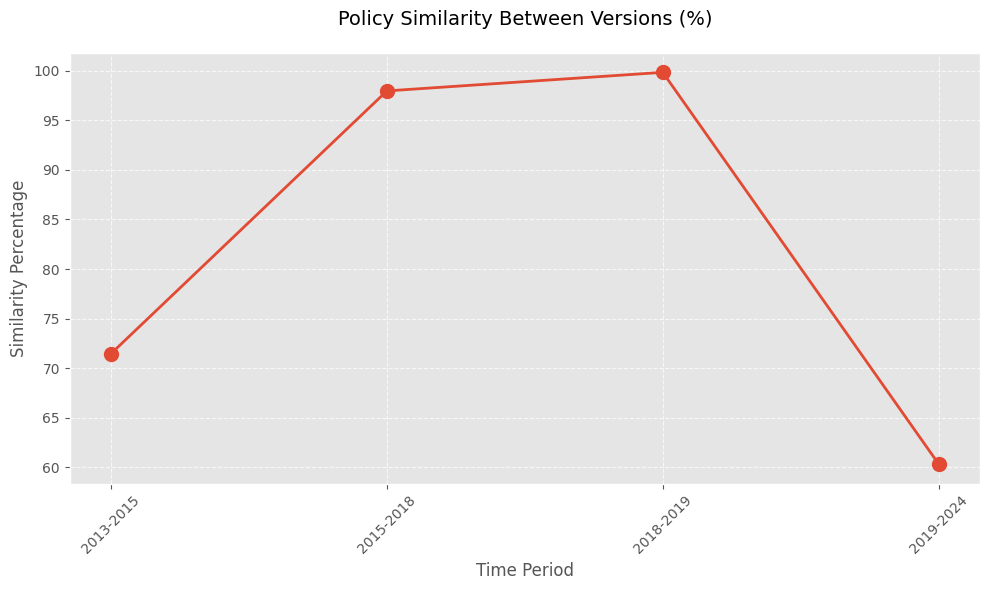

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(similarity_df['Period'], similarity_df['Similarity'], marker='o', linewidth=2, markersize=10)
plt.title('Policy Similarity Between Versions (%)', pad=20, fontsize=14)
plt.ylabel('Similarity Percentage', fontsize=12)
plt.xlabel('Time Period', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

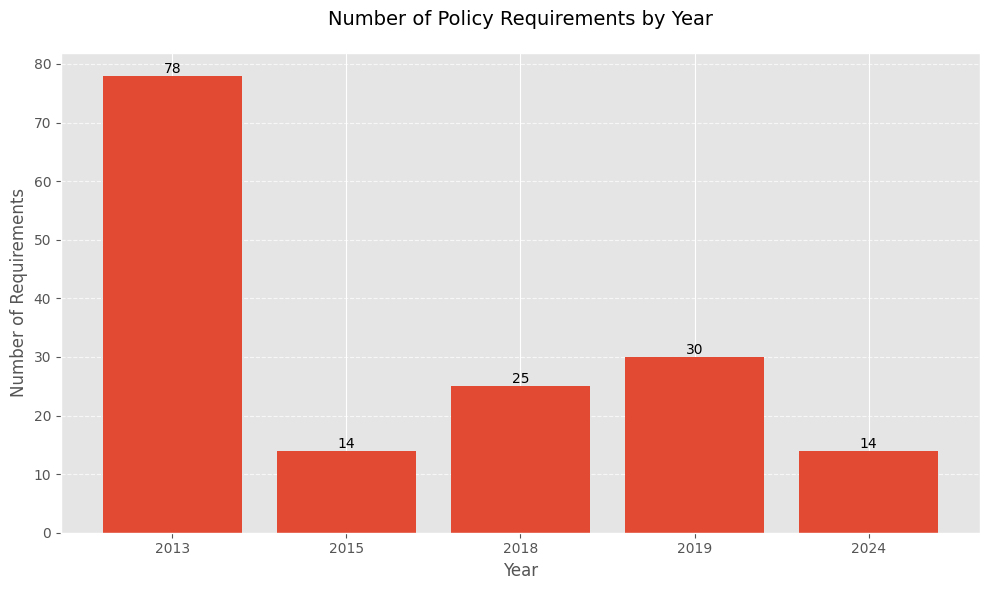

In [6]:
plt.figure(figsize=(10, 6))
bars = plt.bar(requirements_df['Year'], requirements_df['Requirements'])
plt.title('Number of Policy Requirements by Year', pad=20, fontsize=14)
plt.ylabel('Number of Requirements', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,f'{int(height)}',ha='center', va='bottom')

plt.tight_layout()
plt.show()

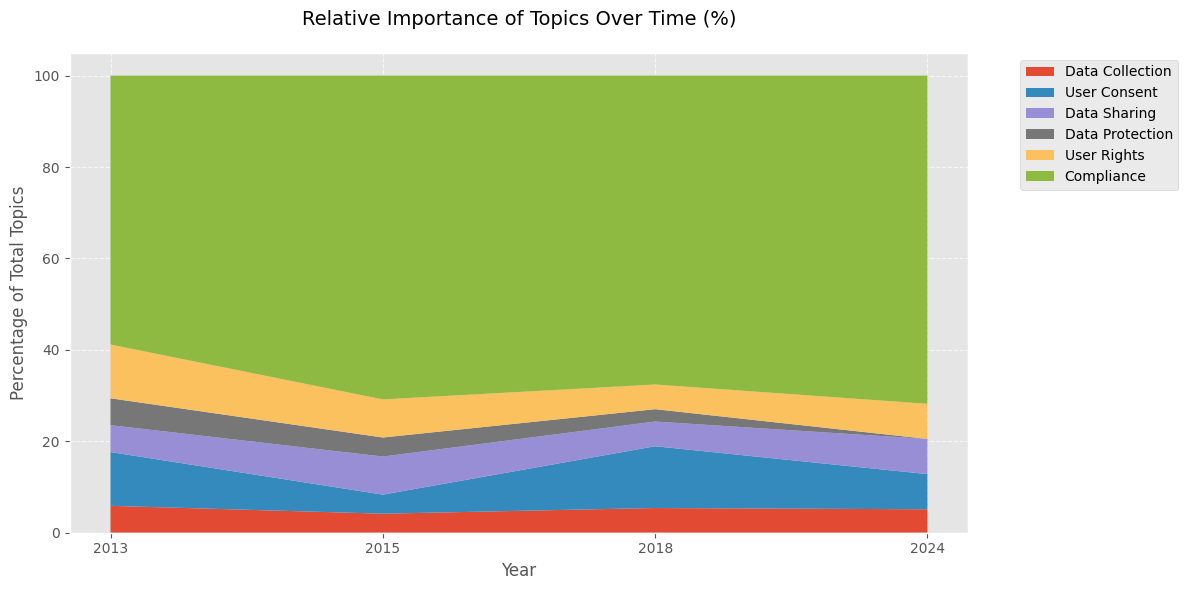

In [7]:
topics_df_pct = topics_df.apply(lambda x: x/x.sum() * 100)
plt.figure(figsize=(12, 6))
plt.stackplot(topics_df_pct.columns, topics_df_pct.values,labels=topics_df_pct.index)
plt.title('Relative Importance of Topics Over Time (%)', pad=20, fontsize=14)
plt.ylabel('Percentage of Total Topics', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

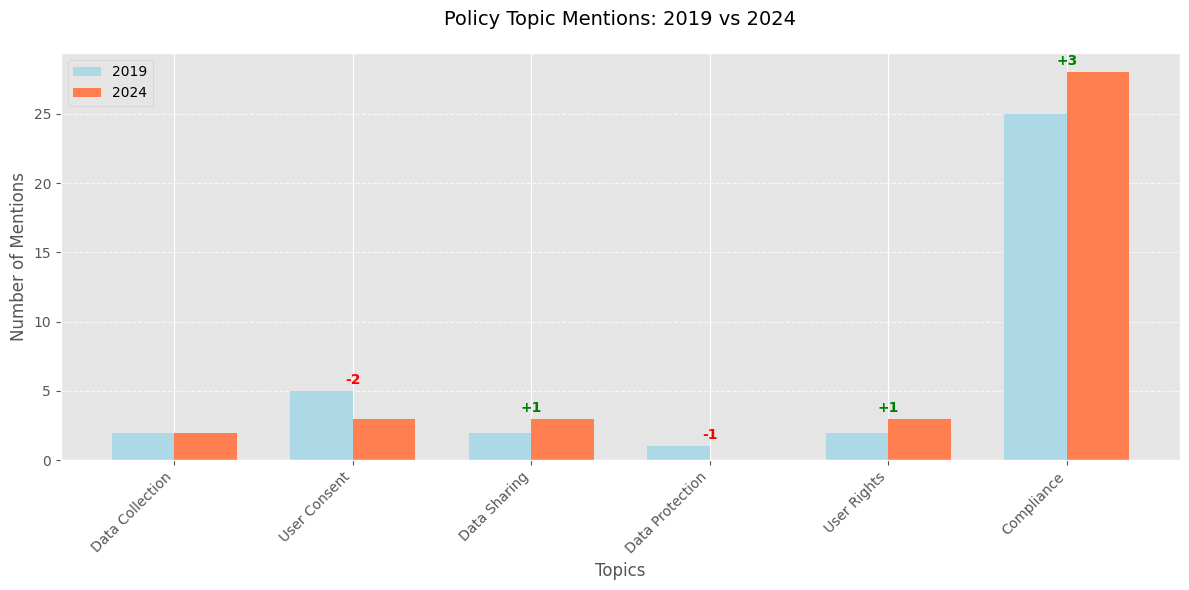

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


plt.style.use('ggplot')


topic_changes = {
    'Topic': ['Data Collection', 'User Consent', 'Data Sharing', 'Data Protection', 'User Rights', 'Compliance'],
    '2019': [2, 5, 2, 1, 2, 25],
    '2024': [2, 3, 3, 0, 3, 28],
    'Change': [0, -2, 1, -1, 1, 3]
}

changes_df = pd.DataFrame(topic_changes)


plt.figure(figsize=(12, 6))
x = np.arange(len(changes_df['Topic']))
width = 0.35

plt.bar(x - width/2, changes_df['2019'], width, label='2019', color='lightblue')
plt.bar(x + width/2, changes_df['2024'], width, label='2024', color='coral')

plt.title('Policy Topic Mentions: 2019 vs 2024', pad=20, fontsize=14)
plt.xlabel('Topics', fontsize=12)
plt.ylabel('Number of Mentions', fontsize=12)
plt.xticks(x, changes_df['Topic'], rotation=45, ha='right')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)


for i, row in changes_df.iterrows():
    if row['Change'] != 0:
        change = row['Change']
        color = 'green' if change > 0 else 'red'
        plt.text(i, max(row['2019'], row['2024']) + 0.5, 
                f"{'+' if change > 0 else ''}{change}", 
                ha='center', color=color, fontweight='bold')

plt.tight_layout()
plt.show()


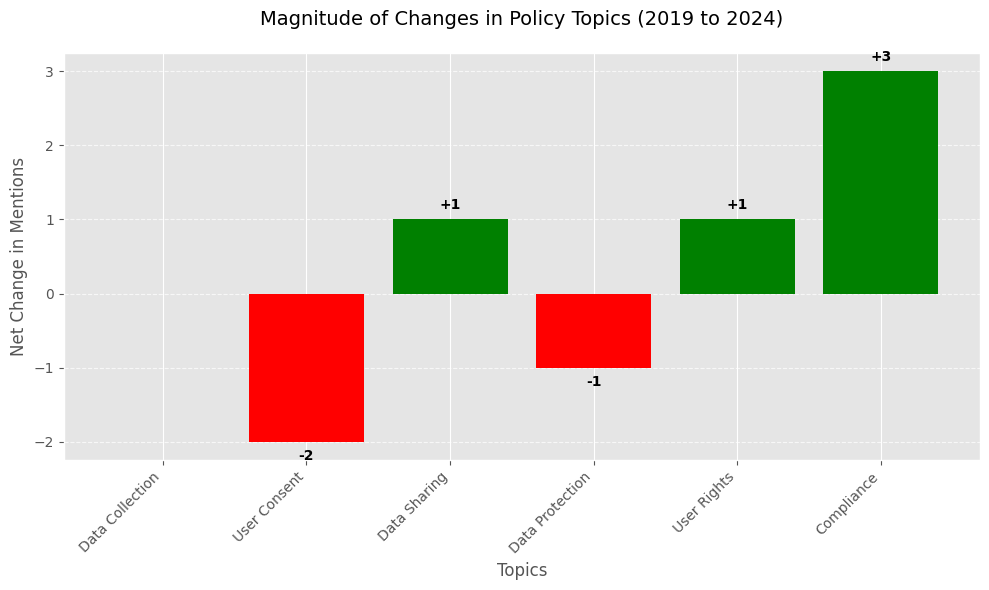

Key changes in policy topics between 2019 and 2024:
User Consent: 5 → 3 (Change: -2)
Data Sharing: 2 → 3 (Change: +1)
Data Protection: 1 → 0 (Change: -1)
User Rights: 2 → 3 (Change: +1)
Compliance: 25 → 28 (Change: +3)


In [9]:
#  change magnitude visualization
plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'green' for x in changes_df['Change']]
plt.bar(changes_df['Topic'], changes_df['Change'], color=colors)
plt.title('Magnitude of Changes in Policy Topics (2019 to 2024)', pad=20, fontsize=14)
plt.xlabel('Topics', fontsize=12)
plt.ylabel('Net Change in Mentions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

#  value labels
for i, v in enumerate(changes_df['Change']):
    if v != 0:
        plt.text(i, v + (0.1 if v > 0 else -0.1), 
                f"{'+' if v > 0 else ''}{v}", 
                ha='center', va='bottom' if v > 0 else 'top',
                fontweight='bold')

plt.tight_layout()
plt.show()
print("Key changes in policy topics between 2019 and 2024:")
for _, row in changes_df.iterrows():
    if row['Change'] != 0:
        print(f"{row['Topic']}: {row['2019']} → {row['2024']} (Change: {'+' if row['Change'] > 0 else ''}{row['Change']})")